In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
!pip install keras_metrics
import keras_metrics
import pandas as pd
%cd /content/drive/MyDrive/
batch_size = 128
epochs = 10
latent_dim = 256 # edit LSTM units
num_samples = 14032
data_path = 'min-ind3.txt'


input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, "r", encoding="utf-8") as f:
  lines = f.read().split("\n")
  #print('lines',lines)
print('lines',lines[:len(lines)])
print(len(lines))
for line in lines[:num_samples]:
  if len(line.split(','))==2:
    input_text, target_text = line.split(",")
  # We use "tab" as the "start sequence" character
  # for the targets, and "\n" as "end sequence" character.
  target_text = "\t" + target_text + "\n"
  input_texts.append(input_text)
  target_texts.append(target_text)
  for char in input_text:
      if char not in input_characters:
          input_characters.add(char)
  for char in target_text:
      if char not in target_characters:
          target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0

/content/drive/MyDrive
lines ['nan,yang', 'di,di', 'dari,dari', 'jo,dengan', 'dan,dan', 'ko,ini', 'adolah,adalah', 'langau,nyamuk', 'pado,pada', 'juo,juga', 'bagian,bagian', 'marupokan,merupakan', 'dalam,dalam', 'indonesia,indonesia', 'biasonyo,biasanya', 'spesies,spesies', 'untuak,untuk', 'kelas,kelas', 'famili,famili', 'ordo,ordo', 'filum,filum', 'arthropoda,arthropoda', 'insecta,insecta', 'daun,daun', 'larva,larva', 'diptera,diptera', 'mamakan,memakan', 'herbivora,herbivora', 'dek,karena', 'sabagai,sebagai', 'ka,ka', 'kota,kota', 'taun,tahun', 'ado,ada', 'iko,ini', 'inyo,dia', 'manjadi,menjadi', 'sabuah,sebuah', 'atau,atau', 'kabupaten,kabupaten', 'marupoan,merupakan', 'urang,orang', 'provinsi,provinsi', 'sarato,serta', 'kecamatan,kecamatan', 'barat,barat', 'indak,tidak', 'alah,telah', 'tahun,tahun', 'baliau,beliau', 'padang,padang', 'dapek,dapat', 'itu,itu', 'salah,salah', 'tu,itu', 'satu,satu', 'gadang,besar', 'utara,utara', 'namo,nama', 'nagari,negeri', 'banyak,banyak', 'lain,lai

k=1
Epoch 1/10
88/88 [==============================] - 5s 22ms/step - loss: 1.9525 - accuracy: 0.5429 - recall_4: 0.3821 - precision_4: 0.8579 - val_loss: 1.0273 - val_accuracy: 0.7162 - val_recall_4: 0.6050 - val_precision_4: 0.9923
Epoch 2/10
88/88 [==============================] - 1s 11ms/step - loss: 1.1414 - accuracy: 0.6746 - recall_4: 0.5646 - precision_4: 0.9813 - val_loss: 0.9127 - val_accuracy: 0.7409 - val_recall_4: 0.6506 - val_precision_4: 0.9872
Epoch 3/10
88/88 [==============================] - 1s 11ms/step - loss: 0.9942 - accuracy: 0.7151 - recall_4: 0.6050 - precision_4: 0.9786 - val_loss: 0.8010 - val_accuracy: 0.7641 - val_recall_4: 0.6590 - val_precision_4: 0.9869
Epoch 4/10
88/88 [==============================] - 1s 11ms/step - loss: 0.8833 - accuracy: 0.7371 - recall_4: 0.6396 - precision_4: 0.9618 - val_loss: 0.7428 - val_accuracy: 0.7760 - val_recall_4: 0.6859 - val_precision_4: 0.9774
Epoch 5/10
88/88 [==============================] - 1s 11ms/step - loss:

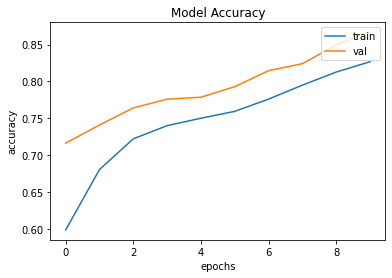

INFO:tensorflow:Assets written to: model_lstm_256_5-Fold1/assets


INFO:tensorflow:Assets written to: model_lstm_256_5-Fold1/assets


k=2
Epoch 1/10
88/88 [==============================] - 5s 22ms/step - loss: 1.9070 - accuracy: 0.5524 - recall_5: 0.3947 - precision_5: 0.8612 - val_loss: 1.1370 - val_accuracy: 0.6828 - val_recall_5: 0.5673 - val_precision_5: 0.9936
Epoch 2/10
88/88 [==============================] - 1s 11ms/step - loss: 1.1242 - accuracy: 0.6803 - recall_5: 0.5763 - precision_5: 0.9807 - val_loss: 0.9902 - val_accuracy: 0.7150 - val_recall_5: 0.5897 - val_precision_5: 0.9957
Epoch 3/10
88/88 [==============================] - 1s 11ms/step - loss: 0.9694 - accuracy: 0.7177 - recall_5: 0.6137 - precision_5: 0.9771 - val_loss: 0.8543 - val_accuracy: 0.7444 - val_recall_5: 0.6467 - val_precision_5: 0.9717
Epoch 4/10
88/88 [==============================] - 1s 12ms/step - loss: 0.8614 - accuracy: 0.7422 - recall_5: 0.6451 - precision_5: 0.9655 - val_loss: 0.8069 - val_accuracy: 0.7539 - val_recall_5: 0.6739 - val_precision_5: 0.9525
Epoch 5/10
88/88 [==============================] - 1s 12ms/step - loss:

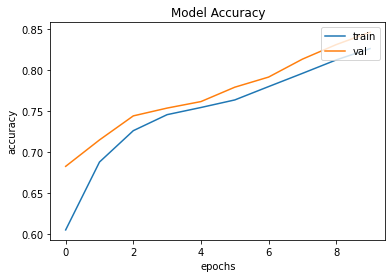

INFO:tensorflow:Assets written to: model_lstm_256_5-Fold2/assets


INFO:tensorflow:Assets written to: model_lstm_256_5-Fold2/assets


k=3
Epoch 1/10
88/88 [==============================] - 4s 22ms/step - loss: 1.9442 - accuracy: 0.5539 - recall_6: 0.3887 - precision_6: 0.8634 - val_loss: 1.2688 - val_accuracy: 0.6372 - val_recall_6: 0.5493 - val_precision_6: 0.9393
Epoch 2/10
88/88 [==============================] - 1s 11ms/step - loss: 1.1335 - accuracy: 0.6789 - recall_6: 0.5730 - precision_6: 0.9776 - val_loss: 1.0749 - val_accuracy: 0.6892 - val_recall_6: 0.5800 - val_precision_6: 0.9863
Epoch 3/10
88/88 [==============================] - 1s 11ms/step - loss: 0.9959 - accuracy: 0.7144 - recall_6: 0.6110 - precision_6: 0.9812 - val_loss: 0.9231 - val_accuracy: 0.7250 - val_recall_6: 0.6224 - val_precision_6: 0.9777
Epoch 4/10
88/88 [==============================] - 1s 11ms/step - loss: 0.8623 - accuracy: 0.7435 - recall_6: 0.6526 - precision_6: 0.9660 - val_loss: 0.8587 - val_accuracy: 0.7439 - val_recall_6: 0.6505 - val_precision_6: 0.9613
Epoch 5/10
88/88 [==============================] - 1s 11ms/step - loss:

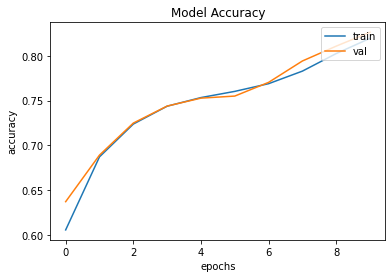

INFO:tensorflow:Assets written to: model_lstm_256_5-Fold3/assets


INFO:tensorflow:Assets written to: model_lstm_256_5-Fold3/assets


k=4
Epoch 1/10
88/88 [==============================] - 4s 22ms/step - loss: 1.9196 - accuracy: 0.5615 - recall_7: 0.3905 - precision_7: 0.8607 - val_loss: 1.2135 - val_accuracy: 0.6525 - val_recall_7: 0.5428 - val_precision_7: 0.9862
Epoch 2/10
88/88 [==============================] - 1s 12ms/step - loss: 1.0960 - accuracy: 0.6864 - recall_7: 0.5866 - precision_7: 0.9804 - val_loss: 1.0964 - val_accuracy: 0.6788 - val_recall_7: 0.5650 - val_precision_7: 0.9829
Epoch 3/10
88/88 [==============================] - 1s 11ms/step - loss: 0.9619 - accuracy: 0.7241 - recall_7: 0.6199 - precision_7: 0.9799 - val_loss: 0.9291 - val_accuracy: 0.7234 - val_recall_7: 0.6236 - val_precision_7: 0.9677
Epoch 4/10
88/88 [==============================] - 1s 11ms/step - loss: 0.8522 - accuracy: 0.7457 - recall_7: 0.6577 - precision_7: 0.9635 - val_loss: 0.8842 - val_accuracy: 0.7322 - val_recall_7: 0.6289 - val_precision_7: 0.9637
Epoch 5/10
88/88 [==============================] - 1s 11ms/step - loss:

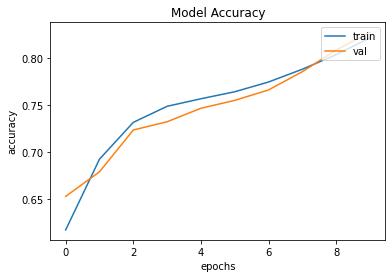

INFO:tensorflow:Assets written to: model_lstm_256_5-Fold4/assets


INFO:tensorflow:Assets written to: model_lstm_256_5-Fold4/assets


k=5
Epoch 1/10
88/88 [==============================] - 4s 22ms/step - loss: 1.9843 - accuracy: 0.5249 - recall_8: 0.3763 - precision_8: 0.8368 - val_loss: 1.2772 - val_accuracy: 0.6365 - val_recall_8: 0.5252 - val_precision_8: 0.9886
Epoch 2/10
88/88 [==============================] - 1s 12ms/step - loss: 1.1225 - accuracy: 0.6740 - recall_8: 0.5698 - precision_8: 0.9832 - val_loss: 1.2191 - val_accuracy: 0.6804 - val_recall_8: 0.5821 - val_precision_8: 0.9724
Epoch 3/10
88/88 [==============================] - 1s 12ms/step - loss: 0.9752 - accuracy: 0.7206 - recall_8: 0.6142 - precision_8: 0.9834 - val_loss: 1.0852 - val_accuracy: 0.7087 - val_recall_8: 0.6169 - val_precision_8: 0.9496
Epoch 4/10
88/88 [==============================] - 1s 12ms/step - loss: 0.8534 - accuracy: 0.7470 - recall_8: 0.6506 - precision_8: 0.9682 - val_loss: 1.0063 - val_accuracy: 0.7195 - val_recall_8: 0.6416 - val_precision_8: 0.9344
Epoch 5/10
88/88 [==============================] - 1s 12ms/step - loss:

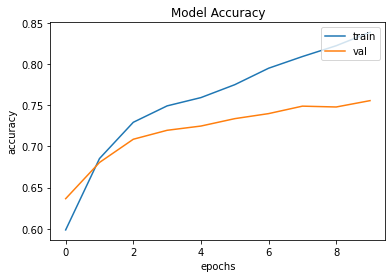

INFO:tensorflow:Assets written to: model_lstm_256_5-Fold5/assets


INFO:tensorflow:Assets written to: model_lstm_256_5-Fold5/assets


In [ ]:

###### 5-Fold Cross Validation ####

from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
kf = KFold(n_splits=5) # 5 folds for training and validation sets
save_dir = '/content/drive/MyDrive/'
fold_var = 5
for i,(train_index,val_index) in enumerate(kf.split(np.zeros(len(input_texts)),decoder_target_data)):
  print('k={}'.format(i+1))
  encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
  encoder = keras.layers.LSTM(latent_dim, return_state=True)
  encoder_outputs, state_h, state_c = encoder(encoder_inputs)
  #encoder_inputs = embedding_layer_input(encoder_inputs)
  # We discard `encoder_outputs` and only keep the states.
  encoder_states = [state_h, state_c] # hidden and cell state

  # Set up the decoder, using `encoder_states` as initial state.
  decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))
  #decoder_inputs = embedding_layer_output(decoder_inputs)
  # We set up our decoder to return full output sequences,
  # and to return internal states as well. We don't use the
  # return states in the training model, but we will use them in inference.
  decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
  decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)


  decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
  decoder_outputs = decoder_dense(decoder_outputs)

  # Define the model that will turn
  # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
  model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
  encoder_input_data_t = pd.Series(list(encoder_input_data)).iloc[train_index].to_numpy()
  decoder_input_data_t = pd.Series(list(decoder_input_data)).iloc[train_index].to_numpy()
  decoder_target_data_t = pd.Series(list(decoder_target_data)).iloc[train_index].to_numpy()

  encoder_input_data_val = pd.Series(list(encoder_input_data)).iloc[val_index].to_numpy()
  decoder_input_data_val = pd.Series(list(decoder_input_data)).iloc[val_index].to_numpy()
  decoder_target_data_val = pd.Series(list(decoder_target_data)).iloc[val_index].to_numpy()


  encoder_input_data_t = np.array([list(en) for en in encoder_input_data_t])
  decoder_input_data_t = np.array([list(en) for en in decoder_input_data_t])
  decoder_target_data_t = np.array([list(en) for en in decoder_target_data_t])

  encoder_input_data_val = np.array([list(en) for en in encoder_input_data_val])
  decoder_input_data_val = np.array([list(en) for en in decoder_input_data_val])
  decoder_target_data_val = np.array([list(en) for en in decoder_target_data_val])
  #checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
	#						monitor='val_accuracy', verbose=1, 
	#						save_best_only=True, mode='max')
	#callbacks_list = [checkpoint]
	# There can be other callbacks  

  #adam = tf.keras.optimizers.SGD(lr=0.001)
  x_test = [encoder_input_data_val,decoder_input_data_val]
  y_test = decoder_target_data_val
  model.compile(
    optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy",keras.metrics.Recall(),keras.metrics.Precision()]
  )
  results = model.fit(
      [encoder_input_data_t, decoder_input_data_t],
      decoder_target_data_t,
      batch_size=batch_size,
      epochs=epochs,
      validation_data =(x_test,y_test)
  )
  plt.plot(results.history['accuracy'])
  plt.plot(results.history['val_accuracy'])
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(['train','val'],loc='upper right')
  plt.title('Model Accuracy')
  plt.show()
  model.save('model_lstm_256_{}-Fold{}'.format(fold_var,i+1))
  model = keras.models.load_model("model_lstm_256_{}-Fold{}".format(fold_var,i+1)) # Using 5-Fold cross validated model

  encoder_inputs = model.input[0]  # input_1
  encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
  encoder_states = [state_h_enc, state_c_enc]
  encoder_model = keras.Model(encoder_inputs, encoder_states)

  decoder_inputs = model.input[1]  # input_2
  decoder_state_input_h = keras.Input(shape=(latent_dim,), name="input_3")
  decoder_state_input_c = keras.Input(shape=(latent_dim,), name="input_5")
  decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
  decoder_lstm = model.layers[3]
  decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
      decoder_inputs, initial_state=decoder_states_inputs
  )
  decoder_states = [state_h_dec, state_c_dec]
  decoder_dense = model.layers[4]
  decoder_outputs = decoder_dense(decoder_outputs)
  decoder_model = keras.Model(
      [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
  )

  # Reverse-lookup token index to decode sequences back to
  # something readable.
  reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
  reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


  def decode_sequence(input_seq):
      # Encode the input as state vectors.
      states_value = encoder_model.predict(input_seq)

      # Generate empty target sequence of length 1.
      target_seq = np.zeros((1, 1, num_decoder_tokens))
      # Populate the first character of target sequence with the start character.
      target_seq[0, 0, target_token_index["\t"]] = 1.0

      # Sampling loop for a batch of sequences
      # (to simplify, here we assume a batch of size 1).
      stop_condition = False
      decoded_sentence = ""
      while not stop_condition:
          output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

          # Sample a token
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_char = reverse_target_char_index[sampled_token_index]
          decoded_sentence += sampled_char

          # Exit condition: either hit max length
          # or find stop character.
          if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
              stop_condition = True

          # Update the target sequence (of length 1).
          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.0

          # Update states
          states_value = [h, c]
      return decoded_sentence
  df = pd.DataFrame()
  input_texts_ls = []
  decoded_sentences_ls = []
  for seq_index in range(0,10):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    input_texts_ls.append(input_texts[seq_index])
    decoded_sentences_ls.append(decoded_sentences_ls)
    #print(type(input_texts_ls))
    #print("-")
    #print("Input sentence:", input_texts[seq_index])
    #print("Decoded sentence:", decoded_sentence)
    
  
  #print(df)
  #df_csv = df.to_csv('Input_decoded_sentences_5-fold-{}.csv'.format(i))
  
  
# Save model
#model.save("s2s_1024_f")

In [ ]:

###### 10-Fold Cross Validation ####

from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
kf = KFold(n_splits=10) # 10 folds for training and validation sets
save_dir = '/content/drive/MyDrive/'
fold_var = 10
for i,(train_index,val_index) in enumerate(kf.split(np.zeros(len(input_texts)),decoder_target_data)):
  print('K={}'.format(i+1))
  encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
  encoder = keras.layers.LSTM(latent_dim, return_state=True)
  encoder_outputs, state_h, state_c = encoder(encoder_inputs)
  #encoder_inputs = embedding_layer_input(encoder_inputs)
  # We discard `encoder_outputs` and only keep the states.
  encoder_states = [state_h, state_c] # hidden and cell state

  # Set up the decoder, using `encoder_states` as initial state.
  decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))
  #decoder_inputs = embedding_layer_output(decoder_inputs)
  # We set up our decoder to return full output sequences,
  # and to return internal states as well. We don't use the
  # return states in the training model, but we will use them in inference.
  decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
  decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)


  decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
  decoder_outputs = decoder_dense(decoder_outputs)

  model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
  encoder_input_data_t = pd.Series(list(encoder_input_data)).iloc[train_index].to_numpy()
  decoder_input_data_t = pd.Series(list(decoder_input_data)).iloc[train_index].to_numpy()
  decoder_target_data_t = pd.Series(list(decoder_target_data)).iloc[train_index].to_numpy()

  encoder_input_data_val = pd.Series(list(encoder_input_data)).iloc[val_index].to_numpy()
  decoder_input_data_val = pd.Series(list(decoder_input_data)).iloc[val_index].to_numpy()
  decoder_target_data_val = pd.Series(list(decoder_target_data)).iloc[val_index].to_numpy()


  encoder_input_data_t = np.array([list(en) for en in encoder_input_data_t])
  decoder_input_data_t = np.array([list(en) for en in decoder_input_data_t])
  decoder_target_data_t = np.array([list(en) for en in decoder_target_data_t])

  encoder_input_data_val = np.array([list(en) for en in encoder_input_data_val])
  decoder_input_data_val = np.array([list(en) for en in decoder_input_data_val])
  decoder_target_data_val = np.array([list(en) for en in decoder_target_data_val])
  #checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
	#						monitor='val_accuracy', verbose=1, 
	#						save_best_only=True, mode='max')
	#callbacks_list = [checkpoint]
	# There can be other callbacks  

  #adam = tf.keras.optimizers.SGD(lr=0.001)
  x_test = [encoder_input_data_val,decoder_input_data_val]
  y_test = decoder_target_data_val
  model.compile(
    optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy",keras.metrics.Recall(),keras.metrics.Precision()]
  )
  results = model.fit(
      [encoder_input_data_t, decoder_input_data_t],
      decoder_target_data_t,
      batch_size=batch_size,
      epochs=epochs,
      validation_data =(x_test,y_test)
  )
  plt.plot(results.history['accuracy'])
  plt.plot(results.history['val_accuracy'])
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(['train','val'],loc='upper right')
  plt.title('Model Accuracy')
  plt.show()
  model.save('model_lstm_256_{}-Fold_{}'.format(fold_var,i+1))
  model = keras.models.load_model("model_lstm_256_{}-Fold{}".format(fold_var,i+1)) # Using 5-Fold cross validated model

  encoder_inputs = model.input[0]  # input_1
  encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
  encoder_states = [state_h_enc, state_c_enc]
  encoder_model = keras.Model(encoder_inputs, encoder_states)

  decoder_inputs = model.input[1]  # input_2
  decoder_state_input_h = keras.Input(shape=(latent_dim,), name="input_3")
  decoder_state_input_c = keras.Input(shape=(latent_dim,), name="input_5")
  decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
  decoder_lstm = model.layers[3]
  decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
      decoder_inputs, initial_state=decoder_states_inputs
  )
  decoder_states = [state_h_dec, state_c_dec]
  decoder_dense = model.layers[4]
  decoder_outputs = decoder_dense(decoder_outputs)
  decoder_model = keras.Model(
      [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
  )

  # Reverse-lookup token index to decode sequences back to
  # something readable.
  reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
  reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


  def decode_sequence(input_seq):
      # Encode the input as state vectors.
      states_value = encoder_model.predict(input_seq)

      # Generate empty target sequence of length 1.
      target_seq = np.zeros((1, 1, num_decoder_tokens))
      # Populate the first character of target sequence with the start character.
      target_seq[0, 0, target_token_index["\t"]] = 1.0

      # Sampling loop for a batch of sequences
      # (to simplify, here we assume a batch of size 1).
      stop_condition = False
      decoded_sentence = ""
      while not stop_condition:
          output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

          # Sample a token
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_char = reverse_target_char_index[sampled_token_index]
          decoded_sentence += sampled_char

          # Exit condition: either hit max length
          # or find stop character.
          if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
              stop_condition = True

          # Update the target sequence (of length 1).
          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.0

          # Update states
          states_value = [h, c]
      return decoded_sentence
  df = pd.DataFrame()
  input_texts_ls = []
  decoded_sentences_ls = []
  for seq_index in range(50):
      # Take one sequence (part of the training set)
      # for trying out decoding.
      input_seq = encoder_input_data[seq_index : seq_index + 1]
      decoded_sentence = decode_sequence(input_seq)
      input_texts_ls.append(input_texts[seq_index])
      decoded_sentences_ls.append(decoded_sentences_ls)
      print("-")
      print("Input sentence:", input_texts[seq_index])
      print("Decoded sentence:", decoded_sentence)
 # df['Input sentences'] = input_texts_ls
 # df['Decoded sentences'] = decoded_sentences_ls
 # df.to_csv('Input_decoded_sentences_10-fold-{}.csv'.format(i))
 
  
# Save model
#model.save("s2s_1024_f")

In [ ]:
!pip install keras_metrics